### Project Title - Exploratory Data Analysis (EDA) on Student Mental Health

#### Objective: This project is to perform basic statistical analysis on student mental health dataset to derive some meaningful conclusions and also understand how GPA of a student is affected by his/her mental health.


#### *Importing Libraries*

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('StdMenHealth.csv')
dataset

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


This Student Mental  Health Dataset has 101 rows and 11 columns. Hence, the columns names need to be renamed for ease of analysis.

#### *Formatting Dataset*

In [4]:
# Renaming each column of the Dataset

dict = {'Choose your gender': 'Gender',
       'What is your course?': 'Course',
       'Your current year of Study' : 'Study Year',
       'What is your CGPA?' : 'CGPA',
       'Do you have Depression?' : 'Depression',
        'Do you have Anxiety?' : 'Anxiety',
        'Do you have Panic attack?' : 'Panic Attack',
        'Did you seek any specialist for a treatment?' : 'Treatment'
       }
    
dataset.rename(columns = dict, inplace = True)
dataset.head()

,Timestamp,Gender,Age,Course,Study Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


From above Dataset it is  indicative that the Timestamp is not important to our analysis, hence the need to remove it.

In [5]:
dataset= dataset.drop(['Timestamp'], axis = 1) #This is used to drop a column that is not useful for the  analysis
dataset

,Gender,Age,Course,Study Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [6]:
print(dataset.shape) #This helps to determine the rows and columns of the Dataset
print()
print(dataset.columns) #This helps to list the names of the columns

(101, 10)

Index(['Gender', 'Age', 'Course', 'Study Year', 'CGPA', 'Marital status',
       'Depression', 'Anxiety', 'Panic Attack', 'Treatment'],
      dtype='object')


In [48]:
dataset["Course"].value_counts() # This is to count the number of appearances of records as supplied by the students


BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

### Performing Exploratory Data Analysis of the Dataset

#### *Differentiating  categorical variables from  numerical variables based on data type.*

In [7]:
catvar = dataset.select_dtypes(include = 'object') # This is to separate unrelated columns in terms of their Data types
numvar = dataset.select_dtypes(exclude = 'object')

catvar.head()

,Gender,Course,Study Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment
0,Female,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


This indicates 9 rows contain categorical variables

In [8]:
print()
numvar.head()

,Age
0,18.0
1,21.0
2,19.0
3,22.0
4,23.0


This indicates only one row has numerical data type

#### *Checking for unique and null values in the dataset*

In [9]:
dataset.isnull().sum() #This is used to determine if there is any void response in any column of the dataset

Gender            0
Age               1
Course            0
Study Year        0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
dtype: int64

In [10]:
dataset.nunique()

Gender             2
Age                7
Course            49
Study Year         7
CGPA               6
Marital status     2
Depression         2
Anxiety            2
Panic Attack       2
Treatment          2
dtype: int64

Condidering the information from the two tables above we observe that most of the features in the dataset are categorical in nature and there is only 1 missing value in age column. 

#### *Handling the missing value in the age column.*

In [11]:
dataset['Age'].fillna(dataset['Age'].median(), inplace = True) #This tells the interpreter to fill the missing row in the age column with the median of all the supplied ages 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          101 non-null    object 
 1   Age             101 non-null    float64
 2   Course          101 non-null    object 
 3   Study Year      101 non-null    object 
 4   CGPA            101 non-null    object 
 5   Marital status  101 non-null    object 
 6   Depression      101 non-null    object 
 7   Anxiety         101 non-null    object 
 8   Panic Attack    101 non-null    object 
 9   Treatment       101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


In [12]:
#Rechecking to make sure null values are filled.

dataset.isnull().sum()


Gender            0
Age               0
Course            0
Study Year        0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
dtype: int64

This implies no null values in the dataset, i.e. all informations are corectly supplied

In [13]:
#Summary of the basuc statistics of the Dataset

dataset.describe()

,Age
count,101.000000
mean,20.514851
std,2.488429
min,18.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,24.000000


**Observation** - The above information indicates the age range of students that filled the questionnaire is between 18 and 24
which simply implies they are college students. The average age of the student is 20 years

Recall the Objective: *The project is to perform basic statistical analysis on student mental health dataset to derive some meaningful conclusions and also understand how GPA of a student is affected by his/her mental health.*


#### *Data Visualisation*

##### *Perfoming Univariate analysis (PDF, CDF, Boxplot, Violin plots) - To know which features are useful towards analysis*

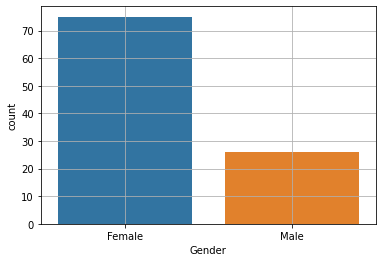

In [14]:
sns.countplot(x='Gender', data = dataset)
plt.grid()
plt.show()

**Observation** - From above graph,  there are more responses from the females than males, we therefore can conclude the dataset is biased

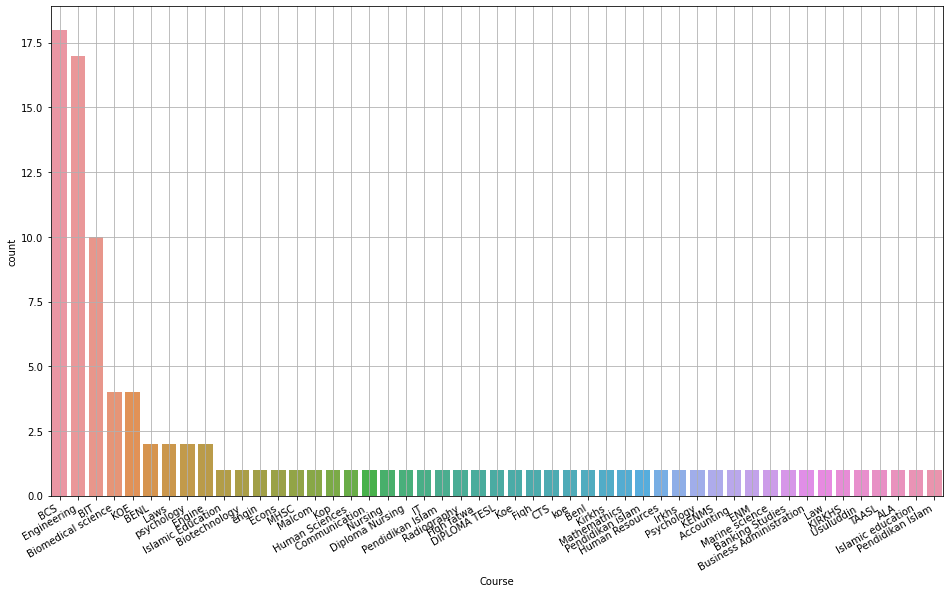

In [15]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x = dataset['Course'], order = dataset['Course'].value_counts(normalize = True).index)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.grid()
plt.show()


**Observation** - From above graph,  there are more responses from stuents studying Engineering and BCS, we therefore can conclude the dataset is biased. But for reliable analysis, we shall group all sing responses as one.

In [16]:
dataset.loc[dataset['Course'].map(dataset['Course'].value_counts(normalize=True).lt(0.01)), 'Course'] = 'Others'

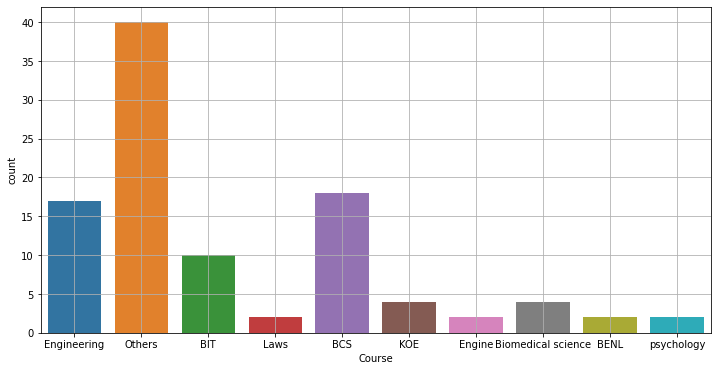

In [17]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x = 'Course', data = dataset)
plt.grid()
plt.show()

**Observation** - From above graph,  there are now more responses from stuents studying other combined courses than Engineering and BCS.

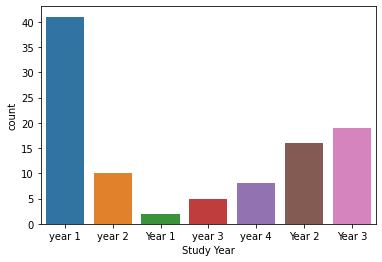

In [18]:
# Plotting the Study Year against the number of responses

sns.countplot(x = 'Study Year', data = dataset)
plt.show()

**Obesrvation** - From the graph above, we observe that the variables are not unique, due to the Data collection structural design i.e. Year 1 and year 1 should be the same and not otherwise.

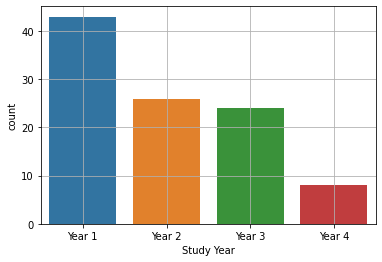

In [19]:
#Merging the separated variables and re-plotting  the information

dataset['Study Year'].replace({'Year 2': 'Year 2' , 'year 2':'Year 2' , 'Year 3':'Year 3' , 'year 3':'Year 3' , 'Year 1':'Year 1','year 4':'Year 4','year 1': 'Year 1'} , inplace = True)

sns.countplot(x= dataset['Study Year'], order = dataset['Study Year'].value_counts(normalize=True).index)
plt.grid()
plt.show()

**Observation** - From the above graph, we observe that most of the responses are from Year 1 students

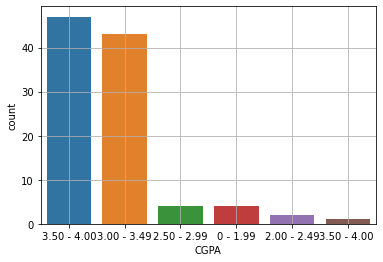

In [20]:
#Plotting the CGPA against the number of responses


sns.countplot(x= dataset['CGPA'], order = dataset['CGPA'].value_counts(normalize=True).index)
plt.grid()
plt.show()

**Observation** - From the graph above, some students have higher CGPA while others have lower CGPA.

**Research Question** : Do student with lower CGPA have Mental Health chanllenge?

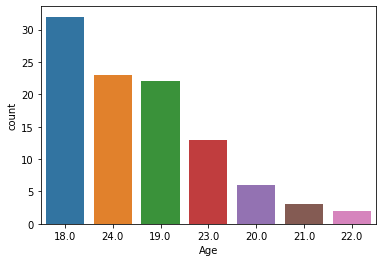

In [21]:
#Plotting the graph of student's Age against the number of responses 

sns.countplot(x = dataset['Age'], order = dataset['Age'].value_counts(normalize = True).index)
plt.show()

**Observation** - From the above graph, we observe that students of 18 years of Age has the highest response and summarily, most the responses are from students who just entered college.

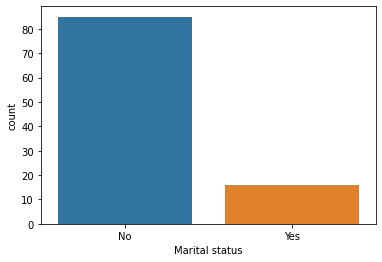

In [23]:
# Plotting the Student's Marital Status against the number of responses

sns.countplot(x= 'Marital status', data = dataset)
plt.show()

**Observation** - From the graph above, we observe that most responses are from students who are yet to be married

##### *Plotting the Graph of various Mental Health issues*

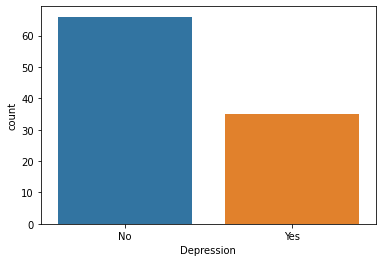

In [24]:
sns.countplot(x = dataset['Depression'], order = dataset['Depression'].value_counts(normalize = True).index)
plt.show()

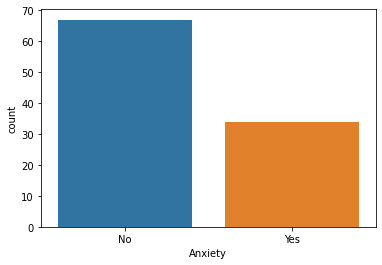

In [25]:
sns.countplot(x= dataset['Anxiety'], order = dataset['Anxiety'].value_counts(normalize=True).index)
plt.show()

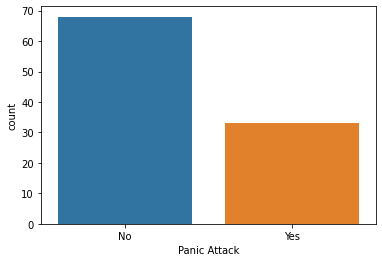

In [26]:
sns.countplot(x = dataset['Panic Attack'], order = dataset['Panic Attack'].value_counts(normalize = True).index)
plt.show()

**Observations**: - From the three graphs above we observe that it seems majority of the students are not suffering from any mental health issue. 

Now, let's check if there is any relation between students scoring low CGPA and any particular mental health issue. 

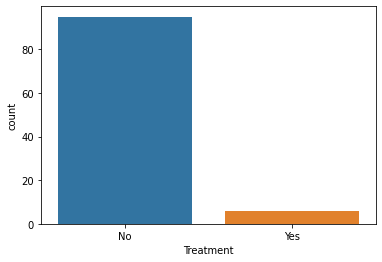

In [27]:
#Plotting the graph of Treament against number of responses

sns.countplot(x = 'Treatment', data = dataset)
plt.show()

**Observation** - From the above graph, the number of students suffering from mental health issues and recieving treatment is small compared to the stuents not recieving treatment.

Hence, the need to perform a **Bivariate Analysis** so as to understand relations between different features.

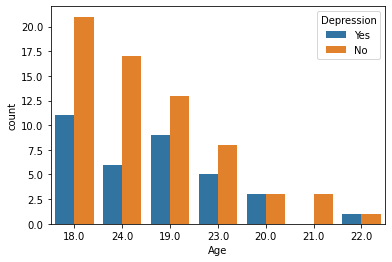

In [29]:
sns.countplot(x = dataset['Age'], hue = dataset['Depression'], order = dataset['Age'].value_counts(normalize=True).index)
plt.show()

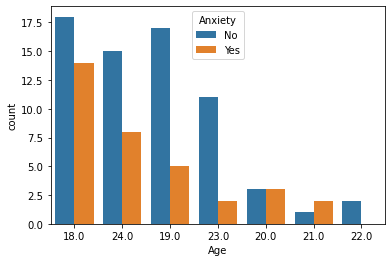

In [30]:
sns.countplot(x = dataset['Age'], hue = dataset['Anxiety'], order = dataset['Age'].value_counts(normalize=True).index)
plt.show()

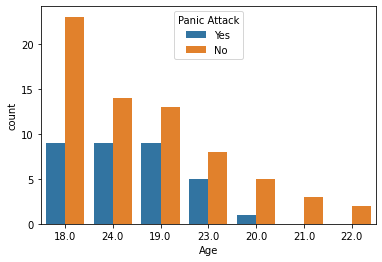

In [31]:
sns.countplot(x = dataset['Age'], hue = dataset['Panic Attack'], order = dataset['Age'].value_counts(normalize=True).index)
plt.show()

**Observation:** From the graphs above, it can be understood that majority of students who are suffering from any kind of mental illness are either the youngest or oldest. 

Hence, it is necessary to check the CGPA of these sets of student.

In [32]:
dataset_new = dataset[(dataset['Age'] == 18) | (dataset['Age'] == 24)]
dataset_new.shape

(55, 10)

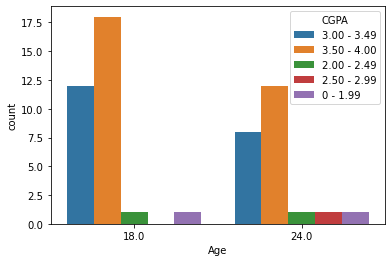

In [33]:
sns.countplot(x= dataset_new['Age'], hue = dataset_new['CGPA'])
plt.show()

**Observation:** From above graph, we can observe that student between age 18 and 24 are has good academic standing, even though some of them are faced with some mental health issues.

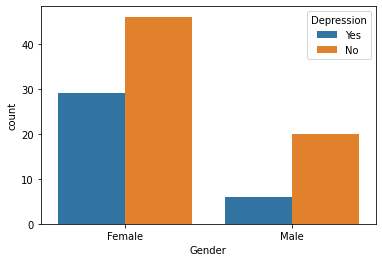

In [35]:
# Now, lets consider our responses based on student's gender

sns.countplot(x = dataset['Gender'], hue = dataset['Depression'])
plt.show()

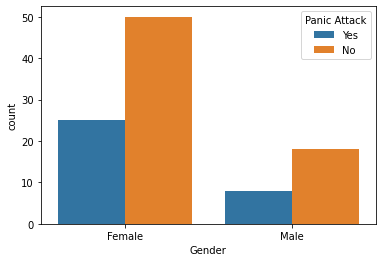

In [36]:
sns.countplot(x = dataset['Gender'], hue = dataset['Panic Attack'])
plt.show()

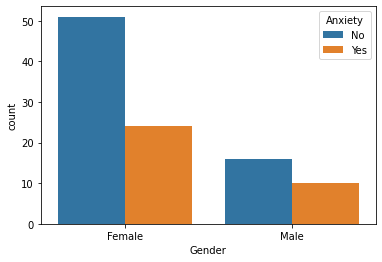

In [37]:
sns.countplot(x = dataset['Gender'], hue = dataset['Anxiety'])
plt.show()

**Observation:** From the graphs above, we can conclude that females are suffering more from mental health issues compared to male.

Now, lets consider the CGPA of female student


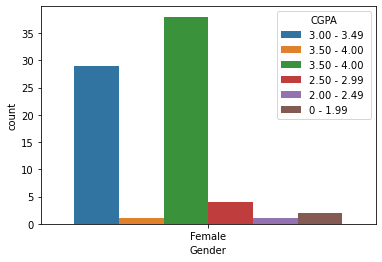

In [38]:
sns.countplot(x = 'Gender', data = dataset[(dataset.Gender == 'Female')], hue = 'CGPA')
plt.show()

Important Note: During Univariate analysis we combined all the subjects taken up only once into a single group. 

Now, let's check how each of the subject compares with CGPA.

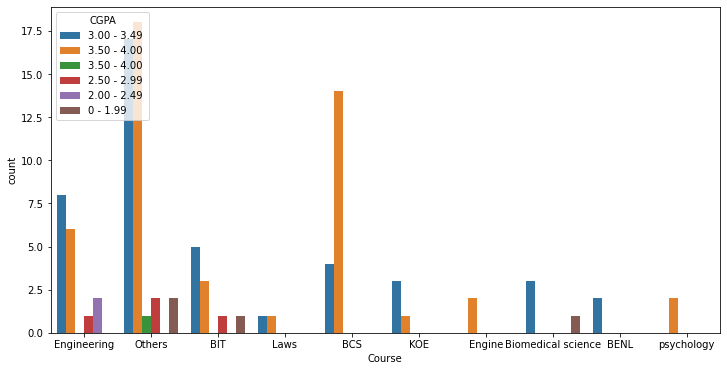

In [39]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x = dataset['Course'], hue = dataset['CGPA'])
plt.show()

**Observation:** From the above graph we can see that students enrolled in different courses has high CGPA. However, some students in Engineering, BIT, and others has low CGPA.

Now, lets check the mental health of students in Engineering, BIT and Others.

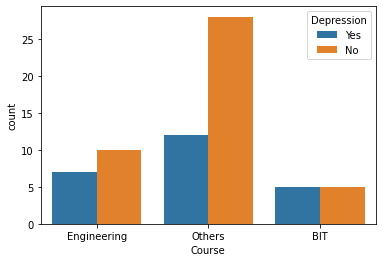

In [40]:
sns.countplot(x = 'Course', data = dataset[(dataset.Course == 'Engineering')|(dataset.Course == 'Others')|(dataset.Course == 'BIT')], hue = 'Depression')
plt.show()

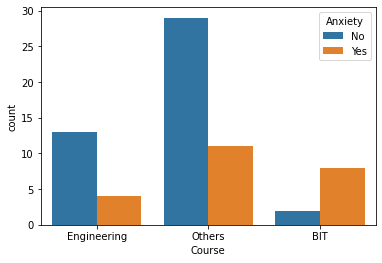

In [41]:
sns.countplot(x = 'Course', data = dataset[(dataset.Course == 'Engineering')|(dataset.Course == 'Others')|(dataset.Course == 'BIT')], hue = 'Anxiety')
plt.show()

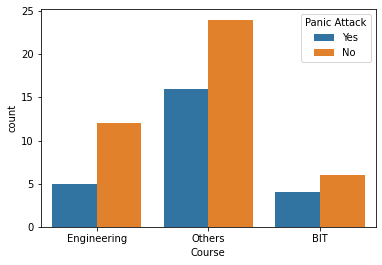

In [42]:
sns.countplot(x = 'Course', data = dataset[(dataset.Course == 'Engineering')|(dataset.Course == 'Others')|(dataset.Course == 'BIT')], hue = 'Panic Attack')
plt.show()

**Observation:**- From the above graphs we can understand that students of course BIT are suffering from Anxiety and thus we can say that there is some relation between course of student with its CGPA and its impact on mental health.

### CONCLUSION

From the above plots it is quite difficult to say if mental health has any effect on CGPA as most of the students are scoring higher CGPA irrespective of Course, Age or Gender they belong to. 

Additionally, dataset is biased towards female students and moreover records of low CGPA are very few and hence, it is challenging to give any concrete answer whether mental health has any relation on CGPA or not.